In [1]:
from typing import TypedDict
# StateGraph = build the graph; START = entry node; END = exit node
from langgraph.graph import StateGraph, START, END
from enum import Enum

In [2]:
class Operation(Enum):
    ADD = "add"
    SUBTRACT = "subtract"
    MULTIPLY = "multiply"

In [3]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    result: int

In [4]:
def adder(state:AgentState) -> AgentState:
    """ This node is to add two numbers """
    state['result'] = state['number1'] + state['number2']
    return state

def subtractor(state:AgentState) -> AgentState:
    """ This node is to subtract two numbers """
    state['result'] = state['number1'] - state['number2']
    return state

def multiplier(state:AgentState) -> AgentState:
    """ This node is to multiply two numbers """
    state['result'] = state['number1'] * state['number2']
    return state
    

In [5]:
def decide_next_node(state:AgentState) -> str:
    """ This node is to decide the next node of the graph """
    if state['operation'] == Operation.ADD.value:
        return Operation.ADD.value
    elif state['operation'] == Operation.SUBTRACT.value:
        return Operation.SUBTRACT.value 
    elif state['operation'] == Operation.MULTIPLY.value:
        return Operation.MULTIPLY.value
    else:
        return Operation.ADD.value

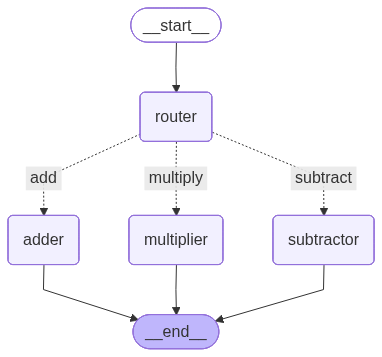

In [7]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("multiplier", multiplier)

# Does NOT modify the state
# Simply returns it unchanged
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")
"""
Here’s what happens:

Router executes

decide_next_node(state) is called

It returns something like "ADD"

Graph looks inside dictionary

Chooses corresponding node
"""
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        Operation.ADD.value: "adder",
        Operation.SUBTRACT.value: "subtractor",
        Operation.MULTIPLY.value: "multiplier",
    }
)

graph.add_edge("adder", END)
graph.add_edge("subtractor", END)
graph.add_edge("multiplier", END)

g = graph.compile()
g

In [ ]:
input_state = {
    "number1": 10,
    "number2": 20,
    "operation": Operation.ADD.value,
}

res = g.invoke(input_state)

res

{'number1': 10, 'number2': 20, 'operation': 'add', 'result': 30}